In [1]:
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [2]:
loaded = np.load('points.npz', allow_pickle=True)
params = pickle.load(open('learnt_params.pkl','rb'))

In [3]:
class GA:
    def __init__(self, sol_per_pop, num_mating_parents, num_generations, loaded_data):
        self.actual_soln = np.array([0.4731626092670898, -0.0441508183575583, 0.5263832159763023, 
                                     -0.37069608365292106, 0.0005558180883213959, 0.08158981483656014, 
                                     0.04423542078796592, -0.008701273453173723, -0.010226538060406862, 
                                     -0.2587535856210682, 1.2110477308015577, 0.16087966951768523, 
                                     0.0372503307035211, 0.05505746663865268, 0.035387828164336055, 
                                     -0.014394489989842656])
        self.num_weights = self.actual_soln.shape[0]
        self.sol_per_pop = sol_per_pop
        self.num_mating_parents = num_mating_parents
        self.num_generations = num_generations
        self.loaded = loaded_data
        self.equation_inputs = loaded['nx'][0]
        self.pop_size = (self.sol_per_pop,self.num_weights)
        self.new_population = np.random.uniform(-1.0,1.0,self.pop_size)
    
    def function_valuation(self, weights):
        x = self.equation_inputs
        w, a0 = weights[0], weights[1]
        a1, a2, a3, a4, a5, a6, a7 = weights[2], weights[3], weights[4], weights[5], weights[6], weights[7], weights[8]
        b1, b2, b3, b4, b5, b6, b7 = weights[9], weights[10], weights[11], weights[12], weights[13], weights[14], weights[15]
        y = a0 + a1*np.cos(w*x) + a2*np.cos(2*w*x) + a3*np.cos(3*w*x) + a4*np.cos(4*w*x) + a5*np.cos(5*w*x) + a6*np.cos(6*w*x)+\
        a7*np.cos(7*w*x) + b1*np.sin(w*x) + b2*np.sin(2*w*x) + b3*np.sin(3*w*x) + b4*np.sin(4*w*x) + b5*np.sin(5*w*x) +\
        b6*np.sin(6*w*x) + b7*np.sin(7*w*x)
        return y
    
    def calc_pop_fitness(self):
        true_val = self.function_valuation(self.actual_soln).reshape((-1,1))
        pop_val = []
        for i in range(len(self.new_population)):
            pop_val.append(np.sum(np.square(self.function_valuation(self.new_population[i,:]).reshape((-1,1))-true_val)))
        self.fitness = np.array(pop_val).reshape((-1,1))

    def select_mating_pool(self):
        parents = np.empty((self.num_mating_parents, self.new_population.shape[1]))
        for parent_num in range(self.num_mating_parents):
            max_fitness_idx = np.where(self.fitness == np.min(self.fitness))
            max_fitness_idx = max_fitness_idx[0][0]
            parents[parent_num, :] = self.new_population[max_fitness_idx, :]
            self.fitness[max_fitness_idx] = 9999999
        self.parents = parents

    def crossover(self, offspring_size):
        self.offspring = np.empty(offspring_size)
        crossover_point = np.uint8(offspring_size[1]/2)

        for k in range(offspring_size[0]):
            parent1_idx = k%self.parents.shape[0]
            parent2_idx = (k+1)%self.parents.shape[0]
            self.offspring[k, 0:crossover_point] = self.parents[parent1_idx, 0:crossover_point]
            self.offspring[k, crossover_point:] = self.parents[parent2_idx, crossover_point:]

    def mutation(self):
        for idx in range(self.offspring.shape[0]):
            random_value = np.random.uniform(-1.0, 1.0, 1)
            rand_ind = np.random.randint(0,5,1)[0]
            self.offspring[idx, rand_ind] = self.offspring[idx, rand_ind] + random_value
    
    def loop_run(self):
        prev_k_fitness = []
        for generation in range(self.num_generations):
            print("Generation : ", generation)
            self.calc_pop_fitness()
            self.select_mating_pool()
            self.crossover(offspring_size=(self.pop_size[0]-self.parents.shape[0], self.num_weights))
            self.mutation()
            self.new_population[0:self.parents.shape[0], :] = self.parents
            self.new_population[self.parents.shape[0]:, :] = self.offspring
            prev_k_fitness.append(np.min(self.fitness))
#             if len(prev_k_fitness) > 25:
#                 del prev_k_fitness[0]
#                 s = 0
#                 for i in range(1,len(prev_k_fitness),1):
#                     s+=np.abs(prev_k_fitness[i-1]-prev_k_fitness[i])
#                 s/=len(prev_k_fitness)
#                 if s < 0.05:
#                     break
            print("Best result : ", np.min(self.fitness))
        self.calc_pop_fitness()
        self.best_match_idx = np.where(self.fitness == np.min(self.fitness))
        print("Best solution : ", self.new_population[self.best_match_idx[0][0], :])
        print("Best solution fitness : ", self.fitness[self.best_match_idx[0][0]])
        self.plot()
        
    def plot(self):
        y_true = self.function_valuation(self.actual_soln)
        y_pred = self.function_valuation(self.new_population[self.best_match_idx[0][0], :])
        plt.plot(y_pred, 'b', label="pred")
        plt.plot(y_true, 'r', label="true")

In [4]:
ga = GA(sol_per_pop=500, num_mating_parents=75, num_generations=500, loaded_data=loaded)

Generation :  0
Best result :  1715.2707676531027
Generation :  1
Best result :  1152.5929803616011
Generation :  2
Best result :  845.7772642457735
Generation :  3
Best result :  749.3377991031988
Generation :  4
Best result :  688.8023456633762
Generation :  5
Best result :  596.5276291437153
Generation :  6
Best result :  501.85287027803906
Generation :  7
Best result :  451.6495451065445
Generation :  8
Best result :  352.60776703400467
Generation :  9
Best result :  191.80662125564655
Generation :  10
Best result :  152.54084411967892
Generation :  11
Best result :  126.53333578710964
Generation :  12
Best result :  112.3014138892915
Generation :  13
Best result :  98.71414711054575
Generation :  14
Best result :  92.71872650451911
Generation :  15
Best result :  81.9157910746082
Generation :  16
Best result :  61.34579214442464
Generation :  17
Best result :  43.12732103728343
Generation :  18
Best result :  36.78235855147739
Generation :  19
Best result :  32.771097732839266
Gen

Best result :  15.758999313456048
Generation :  162
Best result :  15.68019358501207
Generation :  163
Best result :  15.678943401532642
Generation :  164
Best result :  15.678801922811438
Generation :  165
Best result :  15.678180990782302
Generation :  166
Best result :  15.678066752390157
Generation :  167
Best result :  15.676763356533122
Generation :  168
Best result :  15.676441148003736
Generation :  169
Best result :  15.674104329311024
Generation :  170
Best result :  15.67768179527517
Generation :  171
Best result :  15.673034147593064
Generation :  172
Best result :  15.672429025480389
Generation :  173
Best result :  15.671348715235004
Generation :  174
Best result :  15.6710931133551
Generation :  175
Best result :  15.67050662584977
Generation :  176
Best result :  15.670270734811227
Generation :  177
Best result :  15.669694218732275
Generation :  178
Best result :  15.674118910559574
Generation :  179
Best result :  15.66952728335526
Generation :  180
Best result :  15.

Best result :  15.637714540444758
Generation :  322
Best result :  15.63725304099439
Generation :  323
Best result :  15.652875197732694
Generation :  324
Best result :  15.67781612390229
Generation :  325
Best result :  15.637226233399003
Generation :  326
Best result :  15.643226647922344
Generation :  327
Best result :  15.637122647104764
Generation :  328
Best result :  15.637021996556683
Generation :  329
Best result :  15.636948489041357
Generation :  330
Best result :  15.636528873466581
Generation :  331
Best result :  15.636490785440774
Generation :  332
Best result :  15.649339167431036
Generation :  333
Best result :  15.636443179221091
Generation :  334
Best result :  15.63635682368768
Generation :  335
Best result :  15.636154026560849
Generation :  336
Best result :  15.635911011170101
Generation :  337
Best result :  15.635691934041304
Generation :  338
Best result :  15.6355332452655
Generation :  339
Best result :  15.643848553820746
Generation :  340
Best result :  15

Best result :  15.628318471621146
Generation :  482
Best result :  15.628312085142104
Generation :  483
Best result :  15.639580526359463
Generation :  484
Best result :  15.637174628503649
Generation :  485
Best result :  15.628266344887432
Generation :  486
Best result :  15.628258242766803
Generation :  487
Best result :  15.628243966962495
Generation :  488
Best result :  15.628229157488867
Generation :  489
Best result :  15.628211700268036
Generation :  490
Best result :  15.642364431385525
Generation :  491
Best result :  15.643341018177239
Generation :  492
Best result :  15.628105378833178
Generation :  493
Best result :  15.653648779656947
Generation :  494
Best result :  15.629189835208535
Generation :  495
Best result :  15.645667098947284
Generation :  496
Best result :  15.635364063709432
Generation :  497
Best result :  15.632920635491976
Generation :  498
Best result :  15.635937467911194
Generation :  499
Best result :  15.62806275684148
Best solution :  [ 0.12827817 -

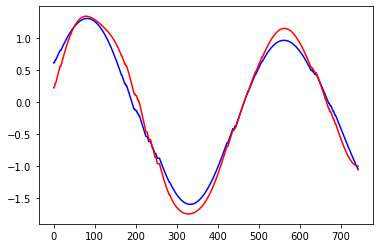

In [5]:
ga.loop_run()

## New Approach

In [12]:
class GA:
    def __init__(self, sol_per_pop, num_mating_parents, num_generations, loaded_data, params):
        self.actual_soln = np.array([params['amp'],params['omega'],params['phase'][3][0]])
        self.offset = params['offset']
        self.phases = params['phase']
        self.num_weights = self.actual_soln.shape[0]
        self.sol_per_pop = sol_per_pop
        self.num_mating_parents = num_mating_parents
        self.num_generations = num_generations
        self.loaded = loaded_data
        self.equation_inputs = np.array(loaded['cx'][0])
        self.pop_size = (self.sol_per_pop,self.num_weights)
        self.new_population = np.random.uniform(-1.0,1.0,self.pop_size)
    
    def function_valuation(self, weights, t=3):
        x = self.equation_inputs
        y = weights[0]*np.sin(weights[1]*x + self.phases[t%len(self.phases)]) + self.offset
        return y
    
    def calc_pop_fitness(self):
        true_val = self.function_valuation(self.actual_soln).reshape((-1,1))
        pop_val = []
        for i in range(len(self.new_population)):
            pop_val.append(np.sum(np.square(self.function_valuation(self.new_population[i,:]).reshape((-1,1))-true_val)))
        self.fitness = np.array(pop_val).reshape((-1,1))

    def select_mating_pool(self):
        parents = np.empty((self.num_mating_parents, self.new_population.shape[1]))
        for parent_num in range(self.num_mating_parents):
            max_fitness_idx = np.where(self.fitness == np.min(self.fitness))
            max_fitness_idx = max_fitness_idx[0][0]
            parents[parent_num, :] = self.new_population[max_fitness_idx, :]
            self.fitness[max_fitness_idx] = 99999999999
        self.parents = parents

    def crossover(self, offspring_size):
        self.offspring = np.empty(offspring_size)
        crossover_point = np.uint8(offspring_size[1]/2)

        for k in range(offspring_size[0]):
            parent1_idx = k%self.parents.shape[0]
            parent2_idx = (k+1)%self.parents.shape[0]
            self.offspring[k, 0:crossover_point] = self.parents[parent1_idx, 0:crossover_point]
            self.offspring[k, crossover_point:] = self.parents[parent2_idx, crossover_point:]

    def mutation(self):
        for idx in range(self.offspring.shape[0]):
            random_value = np.random.uniform(-1.0, 1.0, 1)
            rand_ind = np.random.randint(0,self.num_weights,1)[0]
            self.offspring[idx, rand_ind] = self.offspring[idx, rand_ind] + random_value
    
    def loop_run(self):
        prev_k_fitness = []
        for generation in range(self.num_generations):
            print("Generation : ", generation)
            self.calc_pop_fitness()
            self.select_mating_pool()
            self.crossover(offspring_size=(self.pop_size[0]-self.parents.shape[0], self.num_weights))
            self.mutation()
            self.new_population[0:self.parents.shape[0], :] = self.parents
            self.new_population[self.parents.shape[0]:, :] = self.offspring
            prev_k_fitness.append(np.min(self.fitness))
#             if len(prev_k_fitness) > 25:
#                 del prev_k_fitness[0]
#                 s = 0
#                 for i in range(1,len(prev_k_fitness),1):
#                     s+=np.abs(prev_k_fitness[i-1]-prev_k_fitness[i])
#                 s/=len(prev_k_fitness)
#                 if s < 0.05:
#                     break
            print("Best result : ", np.min(self.fitness))
        self.calc_pop_fitness()
        self.best_match_idx = np.where(self.fitness == np.min(self.fitness))
        print("Best solution : ", self.new_population[self.best_match_idx[0][0], :])
        print("Best solution fitness : ", self.fitness[self.best_match_idx[0][0]])
        self.plot()
        
    def plot(self):
        y_true = self.function_valuation(self.actual_soln)
        y_pred = self.function_valuation(self.new_population[self.best_match_idx[0][0], :])
        plt.plot(y_pred, 'b', label="pred")
        plt.plot(y_true, 'r', label="true")

In [15]:
ga = GA(sol_per_pop=500, num_mating_parents=50, num_generations=500, loaded_data=loaded, params=params)

Generation :  0
Best result :  1417429.378501663
Generation :  1
Best result :  1416695.0316455564
Generation :  2
Best result :  1412399.9058232477
Generation :  3
Best result :  1401638.1770681273
Generation :  4
Best result :  1392774.6295263087
Generation :  5
Best result :  1319986.323292999
Generation :  6
Best result :  1284960.458874247
Generation :  7
Best result :  1248004.1139581578
Generation :  8
Best result :  1222149.2886591582
Generation :  9
Best result :  1193291.1434999688
Generation :  10
Best result :  1161721.8619680547
Generation :  11
Best result :  1133305.346782113
Generation :  12
Best result :  1104234.0655066404
Generation :  13
Best result :  1078312.458072526
Generation :  14
Best result :  1051258.052606447
Generation :  15
Best result :  1021278.5020083968
Generation :  16
Best result :  998505.4707230154
Generation :  17
Best result :  969459.3025552975
Generation :  18
Best result :  940439.9322972675
Generation :  19
Best result :  912131.8738434603


Best result :  467.9913577726791
Generation :  167
Best result :  467.9913577726791
Generation :  168
Best result :  467.9913577726791
Generation :  169
Best result :  467.9913577726791
Generation :  170
Best result :  467.9913577726791
Generation :  171
Best result :  467.9913577726791
Generation :  172
Best result :  467.9913577726791
Generation :  173
Best result :  467.9913577726791
Generation :  174
Best result :  467.9913577726791
Generation :  175
Best result :  467.9913577726791
Generation :  176
Best result :  467.9913577726791
Generation :  177
Best result :  467.9913577726791
Generation :  178
Best result :  467.9913577726791
Generation :  179
Best result :  467.9913577726791
Generation :  180
Best result :  467.9913577726791
Generation :  181
Best result :  467.9913577726791
Generation :  182
Best result :  467.9913577726791
Generation :  183
Best result :  467.9913577726791
Generation :  184
Best result :  467.9913577726791
Generation :  185
Best result :  467.991357772679

Best result :  1.311638091857279
Generation :  337
Best result :  1.311638091857279
Generation :  338
Best result :  1.311638091857279
Generation :  339
Best result :  1.311638091857279
Generation :  340
Best result :  1.311638091857279
Generation :  341
Best result :  1.3114119331583431
Generation :  342
Best result :  1.3113906585463961
Generation :  343
Best result :  1.3113218318845505
Generation :  344
Best result :  1.3113218318845505
Generation :  345
Best result :  1.3113218318845505
Generation :  346
Best result :  1.3113218318845505
Generation :  347
Best result :  1.3113218318845505
Generation :  348
Best result :  1.3113218318845505
Generation :  349
Best result :  1.3113218318845505
Generation :  350
Best result :  1.3113218318845505
Generation :  351
Best result :  1.3113218318845505
Generation :  352
Best result :  1.3113218318845505
Generation :  353
Best result :  1.3111831942523438
Generation :  354
Best result :  1.3111831942523438
Generation :  355
Best result :  1.

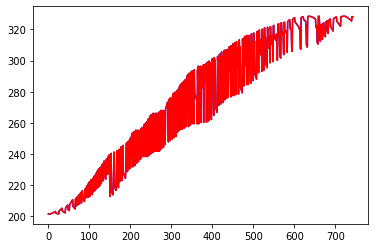

In [16]:
ga.loop_run()

In [17]:
ga.actual_soln

array([ 6.34487357e+01,  1.43523797e-02, -1.49229325e+00])

In [45]:
def give_equation(params, num_joints=8):
    dist = np.ceil(len(params['phase'])/num_joints).astype(int)
    ind = np.arange(0, len(params['phase']), dist)
    p = np.array(params['phase'])[ind].ravel().tolist()
    A = params['amp']
    w = params['omega']
    c = params['offset']
    x = np.arange(0,num_joints,1)
    npr = {}
    npr['amp'] = A
    npr['omega'] = w
    npr['offset'] = c
    npr['phase'] = p
    npr['x'] = x
    return npr

In [46]:
new_params = give_equation(params,10)

In [47]:
pickle.dump(new_params,open('params.pkl','wb'))